In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

old_f= gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\old freguesias\old_freguesias.shp")
current_f = gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\current freguesias\freguesias.shp")
DB11= gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\census 2011\BGRI2011_1106_all.gpkg")
DB21 = gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\data censos 2021\BGRI2021_1106.gpkg")

import warnings
warnings.filterwarnings('ignore')

C:\Users\Desmond\anaconda3\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
DB11.head(5)

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,ANO,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_3OUMAIS,N_EDIFICIOS_CLASSICOS_OUTROS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_PRINCIPAL_RESID,N_EDIFICIOS_PRINCIP_NAO_RESID,N_EDIFICIOS_1OU2_PISOS,N_EDIFICIOS_3OU4_PISOS,.N_EDIFICIOS_5OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1919,N_EDIFICIOS_CONSTR_1919A1945,N_EDIFICIOS_CONSTR_1946A1960,N_EDIFICIOS_CONSTR_1961A1970,N_EDIFICIOS_CONSTR_1971A1980,N_EDIFICIOS_CONSTR_1981A1990,N_EDIFICIOS_CONSTR_1991A1995,N_EDIFICIOS_CONSTR_1996A2000,N_EDIFICIOS_CONSTR_2001A2005,N_EDIFICIOS_CONSTR_2006A2011,N_EDIFICIOS_ESTRUT_BETAO,N_EDIFICIOS_ESTRUT_COM_PLACA,N_EDIFICIOS_ESTRUT_SEM_PLACA,N_EDIFICIOS_ESTRUT_ADOBE_PEDRA,N_EDIFICIOS_ESTRUT_OUTRA,N_ALOJAMENTOS,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASSICOS,N_ALOJAMENTOS_FAM_N_CLASSICOS,N_ALOJAMENTOS_COLECTIVOS,N_CLASSICOS_RES_HABITUAL,N_ALOJAMENTOS_RES_HABITUAL,N_ALOJAMENTOS_VAGOS,N_RES_HABITUAL_COM_AGUA,N_RES_HABITUAL_COM_RETRETE,N_RES_HABITUAL_COM_ESGOTOS,N_RES_HABITUAL_COM_BANHO,N_RES_HABITUAL_AREA_50,N_RES_HABITUAL_AREA_50_100,N_RES_HABITUAL_AREA_100_200,N_RES_HABITUAL_AREA_200,N_RES_HABITUAL_1_2_DIV,N_RES_HABITUAL_3_4_DIV,N_RES_HABITUAL_ESTAC_1,N_RES_HABITUAL_ESTAC_2,N_RES_HABITUAL_ESTAC_3,N_RES_HABITUAL_PROP_OCUP,N_RES_HABITUAL_ARREND,N_FAMILIAS_CLASSICAS,N_FAMILIAS_INSTITUCIONAIS,N_FAMILIAS_CLASSICAS_1OU2_PESS,N_FAMILIAS_CLASSICAS_3OU4_PESS,N_FAMILIAS_CLASSICAS_NPES65,N_FAMILIAS_CLASSICAS_NPES14,N_FAMILIAS_CLASSIC_SEM_DESEMP,N_FAMILIAS_CLASSIC_1DESEMPREG,N_FAMILIAS_CLASS_2MAIS_DESEMP,N_NUCLEOS_FAMILIARES,N_NUCLEOS_1FILH_NAO_CASADO,N_NUCLEOS_2FILH_NAO_CASADO,N_NUCLEOS_FILH_INF_6ANOS,N_NUCLEOS_FILH_INF_15ANOS,N_NUCLEOS_FILH_MAIS_15ANOS,N_INDIVIDUOS_PRESENT,N_INDIVIDUOS_PRESENT_H,N_INDIVIDUOS_PRESENT_M,N_INDIVIDUOS_RESIDENT,N_INDIVIDUOS_RESIDENT_H,N_INDIVIDUOS_RESIDENT_M,N_INDIVIDUOS_RESIDENT_0A4,N_INDIVIDUOS_RESIDENT_5A9,N_INDIVIDUOS_RESIDENT_10A13,N_INDIVIDUOS_RESIDENT_14A19,N_INDIVIDUOS_RESIDENT_15A19,N_INDIVIDUOS_RESIDENT_20A24,N_INDIVIDUOS_RESIDENT_20A64,N_INDIVIDUOS_RESIDENT_25A64,N_INDIVIDUOS_RESIDENT_65,N_INDIVIDUOS_RESIDENT_H_0A4,N_INDIVIDUOS_RESIDENT_H_5A9,N_INDIVIDUOS_RESIDENT_H_10A13,N_INDIVIDUOS_RESIDENT_H_14A19,N_INDIVIDUOS_RESIDENT_H_15A19,N_INDIVIDUOS_RESIDENT_H_20A24,N_INDIVIDUOS_RESIDENT_H_20A64,N_INDIVIDUOS_RESIDENT_H_25A64,N_INDIVIDUOS_RESIDENT_H_65,N_INDIVIDUOS_RESIDENT_M_0A4,N_INDIVIDUOS_RESIDENT_M_5A9,N_INDIVIDUOS_RESIDENT_M_10A13,N_INDIVIDUOS_RESIDENT_M_14A19,N_INDIVIDUOS_RESIDENT_M_15A19,N_INDIVIDUOS_RESIDENT_M_20A24,N_INDIVIDUOS_RESIDENT_M_20A64,N_INDIVIDUOS_RESIDENT_M_25A64,N_INDIVIDUOS_RESIDENT_M_65,N_INDIV_RESIDENT_N_LER_ESCRV,N_IND_RESIDENT_FENSINO_1BAS,N_IND_RESIDENT_FENSINO_2BAS,N_IND_RESIDENT_FENSINO_3BAS,N_IND_RESIDENT_FENSINO_SEC,N_IND_RESIDENT_FENSINO_POSSEC,N_IND_RESIDENT_FENSINO_SUP,N_IND_RESIDENT_ENSINCOMP_1BAS,N_IND_RESIDENT_ENSINCOMP_2BAS,N_IND_RESIDENT_ENSINCOMP_3BAS,N_IND_RESIDENT_ENSINCOMP_SEC,N_IND_RESIDENT_ENSINCOMP_POSEC,N_IND_RESIDENT_ENSINCOMP_SUP,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,geometry
0,1106,15,002,06,11061500206,022406,Lisboa,2011,,8,Subsec��o,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,6,6,0,0,4,4,1,4,4,4,4,0,3,1,0,0,0,0,0,0,1,3,4,0,4,0,2,0,4,0,0,2,0,0,0,0,0,6,3,3,6,3,3,0,0,0,0,0,1,3,2,3,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,3,3,3,0,0,3,0,3,"MULTIPOLYGON (((-88023.735 -105513.530, -88050..."
1,1106,15,002,05,11061500205,022406,Lisboa,2011,,8,Subsec��o,11,1,1,0,0,7,3,7,4,0,5,3,3,10,1,0,0,0,0,0,0,0,0,0,1,7,3,0,50,50,50,0,0,22,22,12,22,22,22,22,6,15,1,0,0,12,0,0,0,10,10,24,0,18,5,9,2,23,1,0,13,6,1,1,2,6,38,22,16,48,27,21,1,1,0,2,2,

In [3]:
DB11.describe()

,ANO,NIVEL,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_3OUMAIS,N_EDIFICIOS_CLASSICOS_OUTROS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_PRINCIPAL_RESID,N_EDIFICIOS_PRINCIP_NAO_RESID,N_EDIFICIOS_1OU2_PISOS,N_EDIFICIOS_3OU4_PISOS,.N_EDIFICIOS_5OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1919,N_EDIFICIOS_CONSTR_1919A1945,N_EDIFICIOS_CONSTR_1946A1960,N_EDIFICIOS_CONSTR_1961A1970,N_EDIFICIOS_CONSTR_1971A1980,N_EDIFICIOS_CONSTR_1981A1990,N_EDIFICIOS_CONSTR_1991A1995,N_EDIFICIOS_CONSTR_1996A2000,N_EDIFICIOS_CONSTR_2001A2005,N_EDIFICIOS_CONSTR_2006A2011,N_EDIFICIOS_ESTRUT_BETAO,N_EDIFICIOS_ESTRUT_COM_PLACA,N_EDIFICIOS_ESTRUT_SEM_PLACA,N_EDIFICIOS_ESTRUT_ADOBE_PEDRA,N_EDIFICIOS_ESTRUT_OUTRA,N_ALOJAMENTOS,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASSICOS,N_ALOJAMENTOS_FAM_N_CLASSICOS,N_ALOJAMENTOS_COLECTIVOS,N_CLASSICOS_RES_HABITUAL,N_ALOJAMENTOS_RES_HABITUAL,N_ALOJAMENTOS_VAGOS,N_RES_HABITUAL_COM_AGUA,N_RES_HABITUAL_COM_RETRETE,N_RES_HABITUAL_COM_ESGOTOS,N_RES_HABITUAL_COM_BANHO,N_RES_HABITUAL_AREA_50,N_RES_HABITUAL_AREA_50_100,N_RES_HABITUAL_AREA_100_200,N_RES_HABITUAL_AREA_200,N_RES_HABITUAL_1_2_DIV,N_RES_HABITUAL_3_4_DIV,N_RES_HABITUAL_ESTAC_1,N_RES_HABITUAL_ESTAC_2,N_RES_HABITUAL_ESTAC_3,N_RES_HABITUAL_PROP_OCUP,N_RES_HABITUAL_ARREND,N_FAMILIAS_CLASSICAS,N_FAMILIAS_INSTITUCIONAIS,N_FAMILIAS_CLASSICAS_1OU2_PESS,N_FAMILIAS_CLASSICAS_3OU4_PESS,N_FAMILIAS_CLASSICAS_NPES65,N_FAMILIAS_CLASSICAS_NPES14,N_FAMILIAS_CLASSIC_SEM_DESEMP,N_FAMILIAS_CLASSIC_1DESEMPREG,N_FAMILIAS_CLASS_2MAIS_DESEMP,N_NUCLEOS_FAMILIARES,N_NUCLEOS_1FILH_NAO_CASADO,N_NUCLEOS_2FILH_NAO_CASADO,N_NUCLEOS_FILH_INF_6ANOS,N_NUCLEOS_FILH_INF_15ANOS,N_NUCLEOS_FILH_MAIS_15ANOS,N_INDIVIDUOS_PRESENT,N_INDIVIDUOS_PRESENT_H,N_INDIVIDUOS_PRESENT_M,N_INDIVIDUOS_RESIDENT,N_INDIVIDUOS_RESIDENT_H,N_INDIVIDUOS_RESIDENT_M,N_INDIVIDUOS_RESIDENT_0A4,N_INDIVIDUOS_RESIDENT_5A9,N_INDIVIDUOS_RESIDENT_10A13,N_INDIVIDUOS_RESIDENT_14A19,N_INDIVIDUOS_RESIDENT_15A19,N_INDIVIDUOS_RESIDENT_20A24,N_INDIVIDUOS_RESIDENT_20A64,N_INDIVIDUOS_RESIDENT_25A64,N_INDIVIDUOS_RESIDENT_65,N_INDIVIDUOS_RESIDENT_H_0A4,N_INDIVIDUOS_RESIDENT_H_5A9,N_INDIVIDUOS_RESIDENT_H_10A13,N_INDIVIDUOS_RESIDENT_H_14A19,N_INDIVIDUOS_RESIDENT_H_15A19,N_INDIVIDUOS_RESIDENT_H_20A24,N_INDIVIDUOS_RESIDENT_H_20A64,N_INDIVIDUOS_RESIDENT_H_25A64,N_INDIVIDUOS_RESIDENT_H_65,N_INDIVIDUOS_RESIDENT_M_0A4,N_INDIVIDUOS_RESIDENT_M_5A9,N_INDIVIDUOS_RESIDENT_M_10A13,N_INDIVIDUOS_RESIDENT_M_14A19,N_INDIVIDUOS_RESIDENT_M_15A19,N_INDIVIDUOS_RESIDENT_M_20A24,N_INDIVIDUOS_RESIDENT_M_20A64,N_INDIVIDUOS_RESIDENT_M_25A64,N_INDIVIDUOS_RESIDENT_M_65,N_INDIV_RESIDENT_N_LER_ESCRV,N_IND_RESIDENT_FENSINO_1BAS,N_IND_RESIDENT_FENSINO_2BAS,N_IND_RESIDENT_FENSINO_3BAS,N_IND_RESIDENT_FENSINO_SEC,N_IND_RESIDENT_FENSINO_POSSEC,N_IND_RESIDENT_FENSINO_SUP,N_IND_RESIDENT_ENSINCOMP_1BAS,N_IND_RESIDENT_ENSINCOMP_2BAS,N_IND_RESIDENT_ENSINCOMP_3BAS,N_IND_RESIDENT_ENSINCOMP_SEC,N_IND_RESIDENT_ENSINCOMP_POSEC,N_IND_RESIDENT_ENSINCOMP_SUP,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID
count,3623.0,3623.0,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.00000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.00000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3

In [4]:
DB11.select_dtypes(include=['object'])

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,GEO_COD_DSG,NIVEL_DSG,N_EDIFICIOS_CLASSICOS_1OU2
0,1106,15,002,06,11061500206,022406,Lisboa,,Subsec��o,0
1,1106,15,002,05,11061500205,022406,Lisboa,,Subsec��o,1
2,1106,35,027,03,11063502703,022406,Lisboa,,Subsec��o,27
3,1106,01,001,07,11060100107,022406,Lisboa,,Subsec��o,24
4,1106,22,008,02,11062200802,022406,Lisboa,,Subsec��o,6
...,...,...,...,...,...,...,...,...,...,...
3618,1106,11,008,01,11061100801,022406,Lisboa,,Subsec��o,6
3619,1106,04,006,01,11060400601,022406,Lisboa,,Subsec��o,0
3620,1106,11,010,01,11061101001,022406,Lisboa,,Subsec��o,18
3621,1106,42,022,01,11064202201,022406,Lisboa,,Subsec��o,0


In [5]:
DB11['N_EDIFICIOS_CLASSICOS_1OU2'] = DB11['N_EDIFICIOS_CLASSICOS_1OU2'].astype(int)

In [6]:
from sklearn.decomposition import PCA

In [7]:
# Keep the independent variables and dependent variable 'FR11'
DB11_FS = DB11.iloc[:,11:-1]
DB11_FS['FR11'] = DB11['FR11']

X = DB11_FS.drop('FR11', axis = 1)
y = DB11_FS['FR11']

In [8]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(X)

# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,2.109032e+05,0.000000e+00,9.162933e-01,0.916293
2,5.934719e+03,-2.049685e+05,2.578407e-02,0.942077
3,4.926712e+03,-1.008007e+03,2.140467e-02,0.963482
4,2.067073e+03,-2.859639e+03,8.980639e-03,0.972463
5,1.420582e+03,-6.464916e+02,6.171882e-03,0.978635
6,8.365485e+02,-5.840333e+02,3.634482e-03,0.982269
7,6.262683e+02,-2.102802e+02,2.720895e-03,0.984990
8,5.687575e+02,-5.751075e+01,2.471033e-03,0.987461
9,4.047057e+02,-1.640518e+02,1.758291e-03,0.989219
10,3.110376e+02,-9.366804e+01,1.351339e-03,0.990571


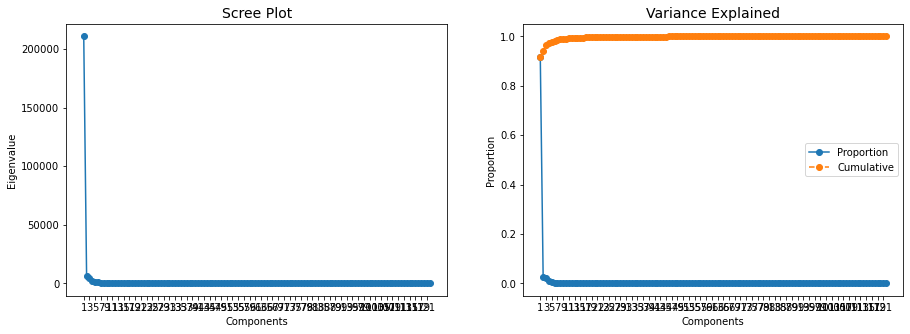

In [9]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [10]:
# According to the Pareto principle, 24 principal components will be used here.
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=24)
pca_feat = pca.fit_transform(X)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=X.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-404.712621,4.100813,-4.963524,-2.857969,-7.981020,10.759719,-7.029118,7.524703,2.119340,-0.393197,-1.319485,-0.812013,1.049880,-2.368926,-1.024147,0.324415,-0.600716,-1.836537,-1.176386,1.378704,-1.186553,-0.224162,0.315246,0.944389
1,-274.801774,-12.090070,-17.015950,-24.422500,9.298958,-1.723416,8.007692,16.802559,-12.292321,-7.798202,6.108036,-0.452997,6.689156,-3.040942,-1.361374,-2.934199,3.735488,-3.981012,1.235726,-0.687805,-1.997356,-1.688950,-1.691394,1.248708
2,-305.231276,-11.965231,7.895135,-12.674752,10.537893,-22.139611,11.825341,-36.590456,4.584686,4.460306,-0.496166,-0.656035,7.535184,9.288058,8.305521,3.894584,4.357828,-21.116355,7.883922,-6.230450,-16.645268,0.206669,1.589487,4.696340
3,-300.993016,-10.730099,13.728425,-10.650364,7.569665,-24.290972,13.222601,-25.440996,2.803247,6.909898,-4.214582,-3.329033,2.762399,-3.007249,1.365100,2.292406,0.449667,-2.104784,3.070142,2.756042,0.869508,0.888470,-9.440240,3.587011
4,-345.579334,8.136911,-4.363802,1.208019,-4.130568,-2.696839,-11.744409,-4.718712,-3.414360,4.310102,0.084023,5.701507,-2.755862,1.548529,7.789459,0.826303,1.637032,-6.953892,1.866306,-3.422421,-0.242178,-1.068507,2.236046,-1.992186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,-251.506544,68.812460,88.436939,124.679221,104.145976,35.948711,16.918821,-9.595538,7.512637,-5.371671,-18.987738,-12.950959,-0.145263,-0.925382,-2.348795,2.091147,14.260047,0.495754,6.480271,0.067382,7.709475,5.915406,6.739295,9.617488
3619,-307.482731,-0.365994,-6.774821,17.980004,-23.115846,6.207778,-6.391835,7.812380,-1.038639,3.394478,-6.719316,-5.754058,-2.428921,6.976212,1.676452,5.820329,-1.349736,2.365222,1.654450,-0.502401,-0.989606,-0.990189,2.661232,-0.113671
3620,840.714749,251.186970,-58.737081,20.146552,-26.191603,-9.613311,19.909422,-56.892402,-4.451133,10.272450,4.786411,-12.019618,14.945070,4.488626,-2.940883,-12.302308,-3.160055,6.688021,3.756624,1.600489,9.762576,-7.434139,-3.195688,-2.263482
3621,1178.727406,-65.764980,-107.832692,145.882266,-72.747652,-87.785415,-61.231872,21.102281,35.995890,-22.079266,-33.473951,-44.092412,-10.122169,-10.246195,2.493348,6.906684,-16.635728,15.950510,11.420281,-0.441964,-26.576366,4.685913,9.981006,-16.507096


In [11]:
# Reassigning df to contain pca variables
df_pca = pd.concat([DB11,pca_df], axis=1)

df_pca.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,ANO,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_3OUMAIS,N_EDIFICIOS_CLASSICOS_OUTROS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_PRINCIPAL_RESID,N_EDIFICIOS_PRINCIP_NAO_RESID,N_EDIFICIOS_1OU2_PISOS,N_EDIFICIOS_3OU4_PISOS,.N_EDIFICIOS_5OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1919,N_EDIFICIOS_CONSTR_1919A1945,N_EDIFICIOS_CONSTR_1946A1960,N_EDIFICIOS_CONSTR_1961A1970,N_EDIFICIOS_CONSTR_1971A1980,N_EDIFICIOS_CONSTR_1981A1990,N_EDIFICIOS_CONSTR_1991A1995,N_EDIFICIOS_CONSTR_1996A2000,N_EDIFICIOS_CONSTR_2001A2005,N_EDIFICIOS_CONSTR_2006A2011,N_EDIFICIOS_ESTRUT_BETAO,N_EDIFICIOS_ESTRUT_COM_PLACA,N_EDIFICIOS_ESTRUT_SEM_PLACA,N_EDIFICIOS_ESTRUT_ADOBE_PEDRA,N_EDIFICIOS_ESTRUT_OUTRA,N_ALOJAMENTOS,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASSICOS,N_ALOJAMENTOS_FAM_N_CLASSICOS,N_ALOJAMENTOS_COLECTIVOS,N_CLASSICOS_RES_HABITUAL,N_ALOJAMENTOS_RES_HABITUAL,N_ALOJAMENTOS_VAGOS,N_RES_HABITUAL_COM_AGUA,N_RES_HABITUAL_COM_RETRETE,N_RES_HABITUAL_COM_ESGOTOS,N_RES_HABITUAL_COM_BANHO,N_RES_HABITUAL_AREA_50,N_RES_HABITUAL_AREA_50_100,N_RES_HABITUAL_AREA_100_200,N_RES_HABITUAL_AREA_200,N_RES_HABITUAL_1_2_DIV,N_RES_HABITUAL_3_4_DIV,N_RES_HABITUAL_ESTAC_1,N_RES_HABITUAL_ESTAC_2,N_RES_HABITUAL_ESTAC_3,N_RES_HABITUAL_PROP_OCUP,N_RES_HABITUAL_ARREND,N_FAMILIAS_CLASSICAS,N_FAMILIAS_INSTITUCIONAIS,N_FAMILIAS_CLASSICAS_1OU2_PESS,N_FAMILIAS_CLASSICAS_3OU4_PESS,N_FAMILIAS_CLASSICAS_NPES65,N_FAMILIAS_CLASSICAS_NPES14,N_FAMILIAS_CLASSIC_SEM_DESEMP,N_FAMILIAS_CLASSIC_1DESEMPREG,N_FAMILIAS_CLASS_2MAIS_DESEMP,N_NUCLEOS_FAMILIARES,N_NUCLEOS_1FILH_NAO_CASADO,N_NUCLEOS_2FILH_NAO_CASADO,N_NUCLEOS_FILH_INF_6ANOS,N_NUCLEOS_FILH_INF_15ANOS,N_NUCLEOS_FILH_MAIS_15ANOS,N_INDIVIDUOS_PRESENT,N_INDIVIDUOS_PRESENT_H,N_INDIVIDUOS_PRESENT_M,N_INDIVIDUOS_RESIDENT,N_INDIVIDUOS_RESIDENT_H,N_INDIVIDUOS_RESIDENT_M,N_INDIVIDUOS_RESIDENT_0A4,N_INDIVIDUOS_RESIDENT_5A9,N_INDIVIDUOS_RESIDENT_10A13,N_INDIVIDUOS_RESIDENT_14A19,N_INDIVIDUOS_RESIDENT_15A19,N_INDIVIDUOS_RESIDENT_20A24,N_INDIVIDUOS_RESIDENT_20A64,N_INDIVIDUOS_RESIDENT_25A64,N_INDIVIDUOS_RESIDENT_65,N_INDIVIDUOS_RESIDENT_H_0A4,N_INDIVIDUOS_RESIDENT_H_5A9,N_INDIVIDUOS_RESIDENT_H_10A13,N_INDIVIDUOS_RESIDENT_H_14A19,N_INDIVIDUOS_RESIDENT_H_15A19,N_INDIVIDUOS_RESIDENT_H_20A24,N_INDIVIDUOS_RESIDENT_H_20A64,N_INDIVIDUOS_RESIDENT_H_25A64,N_INDIVIDUOS_RESIDENT_H_65,N_INDIVIDUOS_RESIDENT_M_0A4,N_INDIVIDUOS_RESIDENT_M_5A9,N_INDIVIDUOS_RESIDENT_M_10A13,N_INDIVIDUOS_RESIDENT_M_14A19,N_INDIVIDUOS_RESIDENT_M_15A19,N_INDIVIDUOS_RESIDENT_M_20A24,N_INDIVIDUOS_RESIDENT_M_20A64,N_INDIVIDUOS_RESIDENT_M_25A64,N_INDIVIDUOS_RESIDENT_M_65,N_INDIV_RESIDENT_N_LER_ESCRV,N_IND_RESIDENT_FENSINO_1BAS,N_IND_RESIDENT_FENSINO_2BAS,N_IND_RESIDENT_FENSINO_3BAS,N_IND_RESIDENT_FENSINO_SEC,N_IND_RESIDENT_FENSINO_POSSEC,N_IND_RESIDENT_FENSINO_SUP,N_IND_RESIDENT_ENSINCOMP_1BAS,N_IND_RESIDENT_ENSINCOMP_2BAS,N_IND_RESIDENT_ENSINCOMP_3BAS,N_IND_RESIDENT_ENSINCOMP_SEC,N_IND_RESIDENT_ENSINCOMP_POSEC,N_IND_RESIDENT_ENSINCOMP_SUP,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,geometry,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,1106,15,002,06,11061500206,022406,Lisboa,2011,,8,Subsec��o,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,6,6,0,0,4,4,1,4,4,4,4,0,3,1,0,0,0,0,0,0,1,3,4,0,4,0,2,0,4,0,0,2,0,0,0,0,0,6,3,3,6,3,3,0,0,0,0,0,1,3,2,3,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,3,3,3,0,0,3,0,3,"MULTIPOLYGON (((-88023.735 -105513.530, -88050...",-404.712621,4.100813,-4.963524,-2.857969,-7.981020,10.759719,-7.029118,7.524703,2.119340,-0.393197,-1.319485,-0.812013,1.049880,-2.

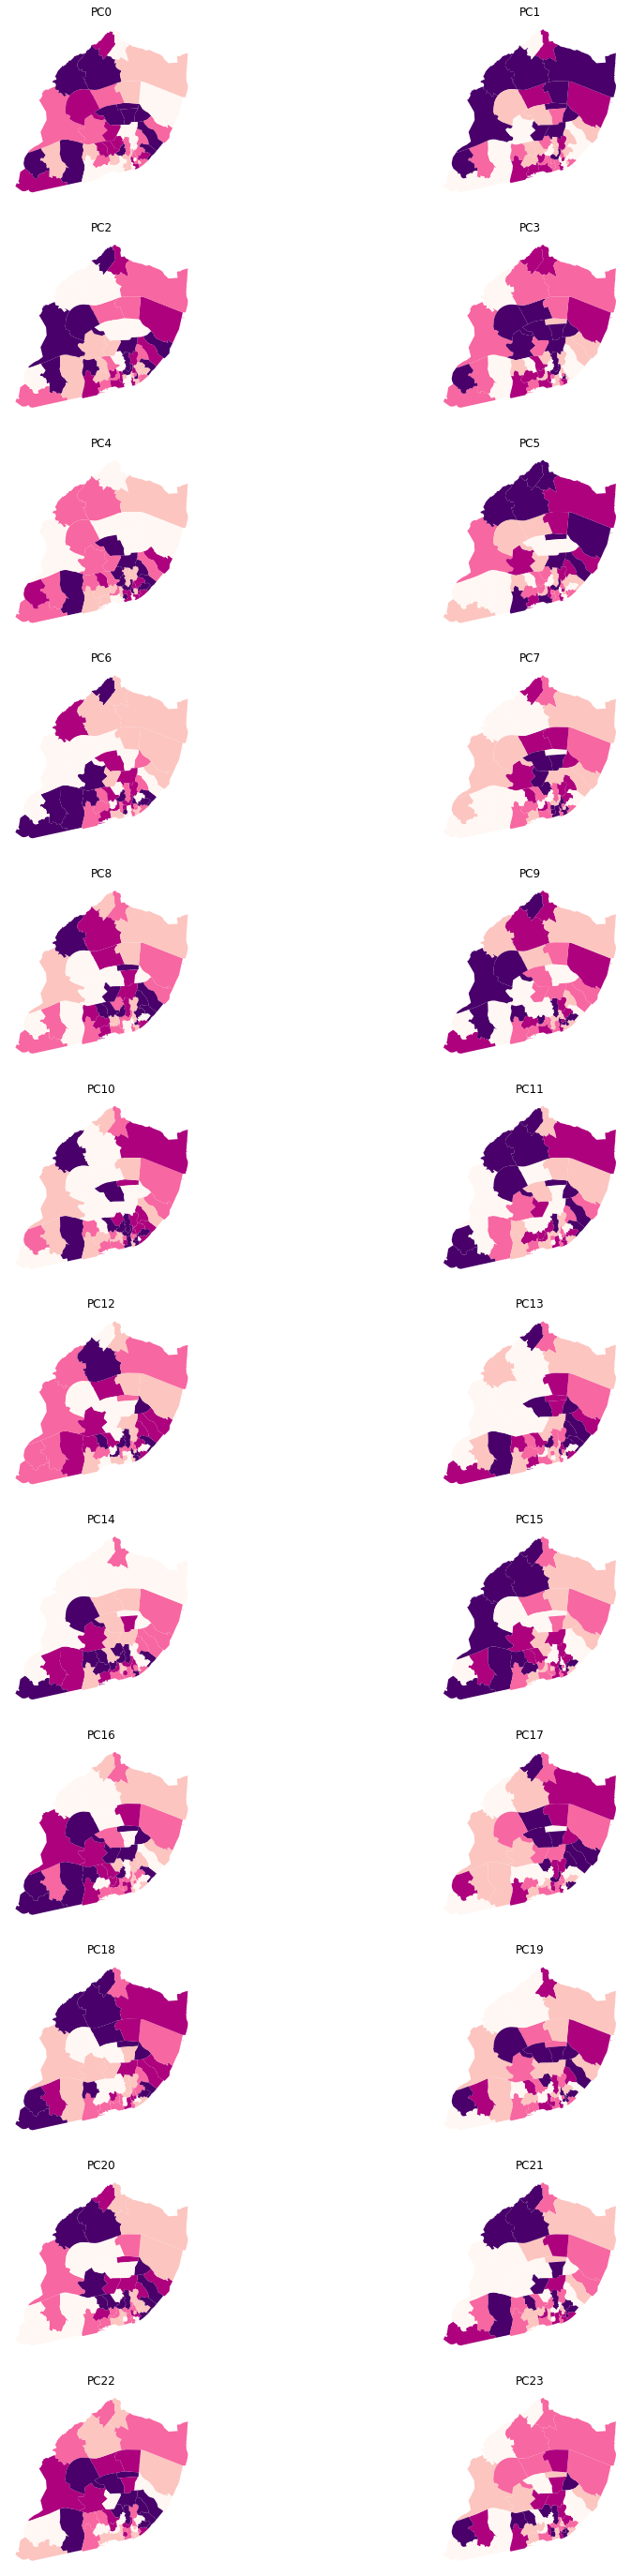

In [12]:
FR11 = df_pca.dissolve(by=['FR11'])

# the spatial distribution of each variable alone. 
f, axs = plt.subplots(nrows=12, ncols=2, figsize=(15,50))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(pca_feat_names):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    FR11.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [13]:
# Initialise KMeans instance
from sklearn.cluster import KMeans

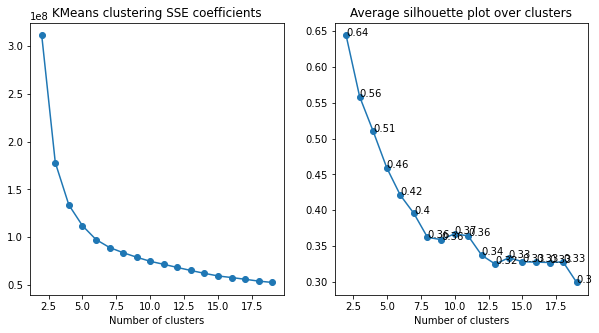

In [14]:
from sklearn.metrics import silhouette_score
# use sse coefficients and Elbow method to select the number of clusters 
sse = []
scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    scores.append(silhouette_score(pca_df, kmeans.labels_, metric='euclidean'))
    sse.append(kmeans.inertia_)
    
x = [i for i in range(2,20)]
 
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('KMeans clustering SSE coefficients')
plt.xlabel('Number of clusters')
plt.plot(x, sse, 'o-')
 
plt.subplot(1,2,2)
plt.title('Average silhouette plot over clusters')
plt.xlabel('Number of clusters')
for i in range(2, 20):
    plt.text(i, scores[i-2], (str(round(scores[i-2], 2))))    
plt.plot(x, scores, 'o-')

In [51]:
# Initialise KMeans instance， Selection of 11 number of clusters based on elbow method
kmeans = KMeans(n_clusters=28)

# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k11cls = kmeans.fit(df_pca[pca_feat_names])

# Print first five labels
k11cls.labels_[:5]

array([ 1, 27, 27, 27, 27])

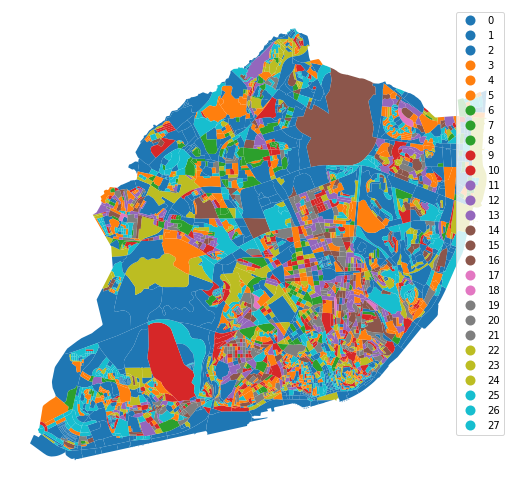

In [52]:
# Assign labels into a column
df_pca["k11cls"] = k11cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
df_pca.plot(
    column="k11cls", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [53]:
# Group data table by cluster label and count observations
k11sizes = df_pca.groupby("k11cls").size()
k11sizes.describe()

count     28.000000
mean     129.392857
std      198.799422
min        1.000000
25%       15.250000
50%       51.000000
75%      108.500000
max      814.000000
dtype: float64

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
from libpysal.weights import Queen, KNN

In [19]:
w = Queen.from_dataframe(df_pca)

In [20]:
from pysal.lib import weights

In [26]:
w = weights.distance.Kernel.from_dataframe(df_pca)

In [33]:
w = weights.distance.Kernel.from_dataframe(
    df_pca, fixed=False, k=15
)

In [36]:
w = weights.util.block_weights(df_pca["FR11"].values)

In [39]:
mx_queen = weights.contiguity.Queen.from_dataframe(df_pca)
mx_bw = weights.util.block_weights(df_pca["FR11"].values)
W = weights.set_operations.w_union(mx_bw, mx_queen)

In [40]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=11
)
# Fit algorithm to the data
model.fit(df_pca[pca_feat_names])

AgglomerativeClustering(connectivity=<3623x3623 sparse matrix of type '<class 'numpy.float64'>'
	with 405246 stored elements in Compressed Sparse Row format>,
                        n_clusters=11)

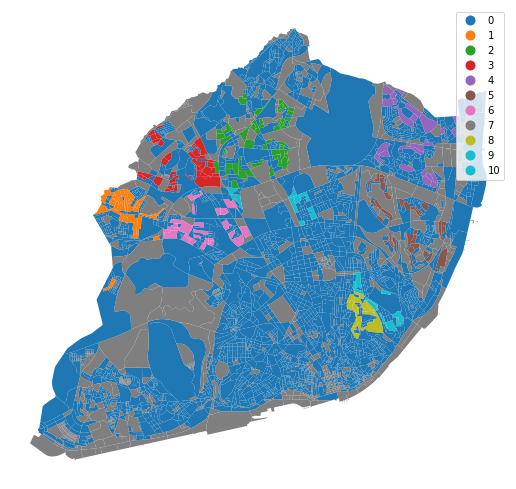

In [41]:
df_pca["wardwq"] = model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
df_pca.plot(
    column="wardwq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [29]:
w = KNN.from_dataframe(df_pca, k=4)

In [30]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=23
)
# Fit algorithm to the data
model.fit(df_pca[pca_feat_names])

AgglomerativeClustering(connectivity=<3623x3623 sparse matrix of type '<class 'numpy.float64'>'
	with 14492 stored elements in Compressed Sparse Row format>,
                        n_clusters=23)

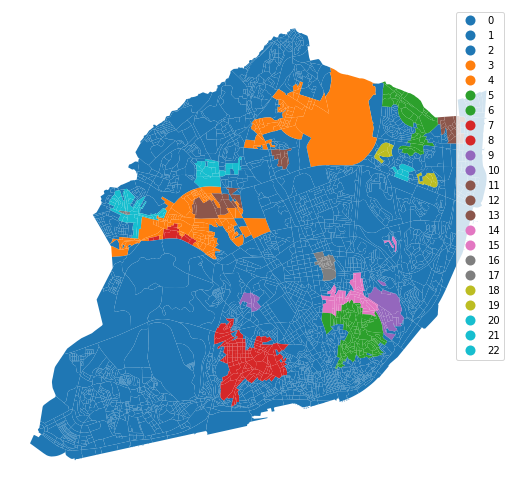

In [31]:
df_pca["wardwknn"] = model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
df_pca.plot(
    column="wardwknn",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [47]:
results = []
for cluster_type in ("k11cls","wardwq", "wardwknn"):
    # compute the region polygons using a dissolve
    regions = df_pca[[cluster_type, "geometry"]].dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = (
        regions.area * 4 * np.pi / (regions.boundary.length ** 2)
    )
    # cast to a dataframe
    result = ipqs.to_frame(cluster_type)
    results.append(result)
# stack the series together along columns
pd.concat(results, axis=1)

,k11cls,wardwq,wardwknn
0,0.003074,0.015896,0.130487
1,0.006172,0.010254,0.046512
2,0.002606,0.014946,0.017604
3,0.044901,0.033032,0.036228
4,0.002303,0.123430,0.095843
5,0.002984,0.142501,0.136005
6,0.021723,0.156694,0.113585
7,0.008099,0.266897,0.144834
8,0.002403,0.174436,0.109583
9,0.013746,0.402390,0.207145


In [48]:
from sklearn import metrics

In [49]:
ch_scores = []
for cluster_type in ("k11cls","wardwq", "wardwknn"):
    # compute the CH score
    ch_score = metrics.calinski_harabasz_score(
        # using scaled variables
        df_pca[pca_feat_names],
        # using these labels
        df_pca[cluster_type],
    )
    # and append the cluster type with the CH score
    ch_scores.append((cluster_type, ch_score))

# re-arrange the scores into a dataframe for display
pd.DataFrame(
    ch_scores, columns=["cluster type", "CH score"]
).set_index("cluster type")

,CH score
cluster type,
k11cls,3835.000897
wardwq,234.544813
wardwknn,110.965305


In [211]:
ami_scores = []
# for each cluster solution
for i_cluster_type in ("k5cls", "ward5", "ward5wq", "ward5wknn"):
    # for every other clustering
    for j_cluster_type in ("k5cls", "ward5", "ward5wq", "ward5wknn"):
        # compute the adjusted mutual info between the two
        ami_score = metrics.adjusted_mutual_info_score(
            BGRI2011[i_cluster_type], BGRI2011[j_cluster_type]
        )
        # and save the pair of cluster types with the score
        ami_scores.append((i_cluster_type, j_cluster_type, ami_score))
# arrange the results into a dataframe
results = pd.DataFrame(
    ami_scores, columns=["source", "target", "similarity"]
)
# and spread the dataframe out into a square
results.pivot("source", "target", "similarity")

target,k5cls,ward5,ward5wknn,ward5wq
source,,,,
k5cls,1.000000,0.683187,0.187944,0.187944
ward5,0.683187,1.000000,0.184824,0.184824
ward5wknn,0.187944,0.184824,1.000000,1.000000
ward5wq,0.187944,0.184824,1.000000,1.000000


<AxesSubplot:>

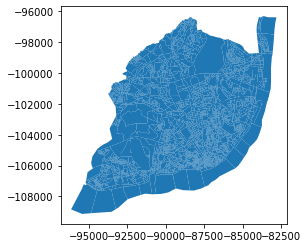

In [45]:
DB21.plot()

<AxesSubplot:>

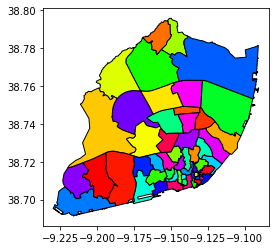

In [8]:
old_f.plot(edgecolor='black',cmap='hsv',column='NOME')

<AxesSubplot:>

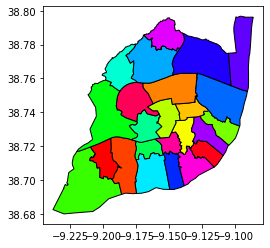

In [9]:
current_f.plot(edgecolor='black',cmap='hsv',column='Freguesia')